# Exercício 06
## Dados desbalanceados
### Alunos:

- Pedro Zenatte - 13676919
-
-


---

O dataset que será utilizado é o conjunto sobre dados de Câncer de mama: sklearn.datasets.load_breast_cancer. Trata-se de um problema com duas classes: "cancer" e não-cancer".

**Esse exercício possui material complementar (Undersampling e Oversampling no Pandas) - É indicado entender bem o Exemplo antes de resolver as questões abaixo.**

**OBS: Evitar usar IA. Tente resolver sozinho**

---

## OBSERVAÇÃO:

A maneira correta de se fazer essas operações de balanceamento é balancear apenas o conjunto de **treino**.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Questão 01.
Carregue o dataset 'breast_cancer' (já disponível no pandas), inspecione o dataset e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe (Usar: value_counts())



         ID diagnostico  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302           M        17.99         10.38          122.80     1001.0   
1    842517           M        20.57         17.77          132.90     1326.0   
2  84300903           M        19.69         21.25          130.00     1203.0   
3  84348301           M        11.42         20.38           77.58      386.1   
4  84358402           M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_wor

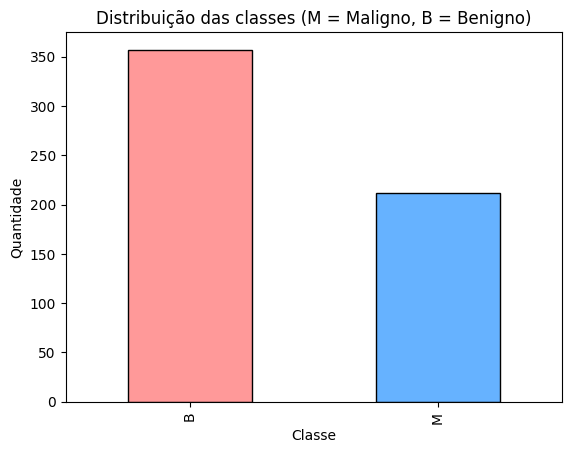

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Definição das colunas (conforme UCI Breast Cancer Wisconsin Diagnostic dataset)
colunas = [
    "ID", "diagnostico",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
    "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se", "concave_points_se",
    "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
    "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Lendo o dataset do Drive
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wdbc.data", names=colunas)

# Vamos inspecionar
print(dados.head())
print("\nInformações gerais:")
print(dados.info())

# Distribuição das classes
print("\nDistribuição das classes:")
print(dados["diagnostico"].value_counts())

# Plotando histograma das classes
dados["diagnostico"].value_counts().plot(
    kind="bar", color=["#FF9999", "#66B2FF"], edgecolor="black"
)
plt.title("Distribuição das classes (M = Maligno, B = Benigno)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()




> Adicionar aspas



---

### Questão 02.

Utilize a técnica de subamostragem aleatória nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial**. Exiba o histograma das classes.

DICA: Separe os dados em 3 classes diferentes e use o classe_X.sample para gerar novas amostras.

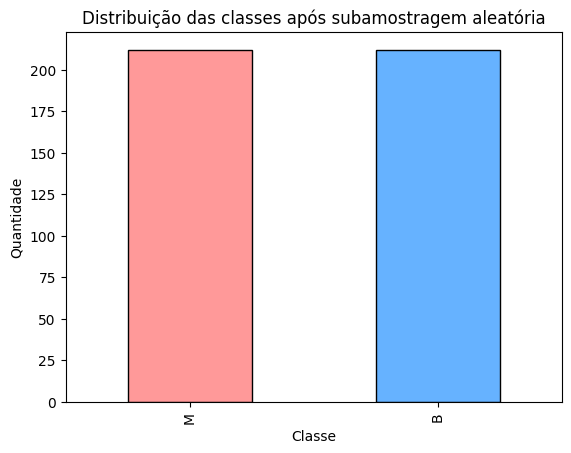

,count
diagnostico,
M,212
B,212


In [3]:
import matplotlib.pyplot as plt

# Separar as classes
classe_M = dados[dados["diagnostico"] == "M"]
classe_B = dados[dados["diagnostico"] == "B"]

# Identificar tamanho da classe minoritária
min_count = min(len(classe_M), len(classe_B))

# Subamostragem aleatória
classe_M_bal = classe_M.sample(n=min_count, random_state=42)
classe_B_bal = classe_B.sample(n=min_count, random_state=42)

# Concatenar as duas classes balanceadas
dados_balanceados = pd.concat([classe_M_bal, classe_B_bal])

# Exibir distribuição balanceada
dist_bal = dados_balanceados["diagnostico"].value_counts()

# Plotar histograma das classes balanceadas
dist_bal.plot(kind="bar", color=["#FF9999", "#66B2FF"], edgecolor="black")
plt.title("Distribuição das classes após subamostragem aleatória")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

dist_bal


O histograma acima mostra que agora ambas têm a mesma quantidade de amostras da classe minoritária.



---

### Questão 03.

Utilize a técnica de superamostragem aleatória nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial**.
Exiba o histograma das classes.

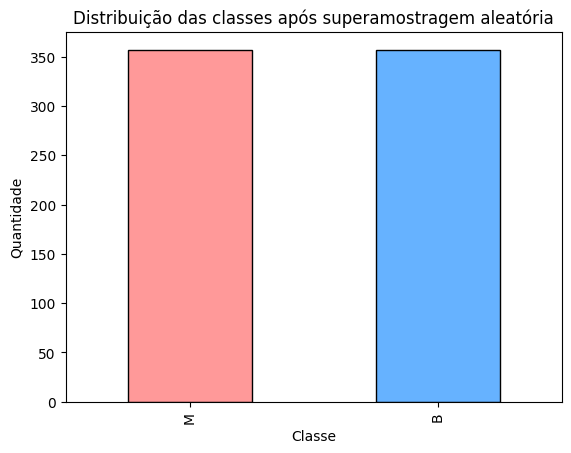

,count
diagnostico,
M,357
B,357


In [4]:
# Superamostragem aleatória: aumentar a classe minoritária até o tamanho da maior
max_count = max(len(classe_M), len(classe_B))

# Reamostrar as classes
classe_M_over = classe_M.sample(n=max_count, replace=True, random_state=42)
classe_B_over = classe_B.sample(n=max_count, replace=True, random_state=42)

# Concatenar os dados balanceados
dados_super = pd.concat([classe_M_over, classe_B_over])

# Exibir distribuição balanceada
dist_super = dados_super["diagnostico"].value_counts()

# Plotar histograma das classes balanceadas (superamostragem)
dist_super.plot(kind="bar", color=["#FF9999", "#66B2FF"], edgecolor="black")
plt.title("Distribuição das classes após superamostragem aleatória")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

dist_super


O histograma mostra que as classes ficaram equilibradas, só que dessa vez por replicação de amostras da classe minoritária.

---

### Questão 04.

Utilize as técnicas de subamostragem e superamostragem nesse conjunto de dados. Ao final da sua operação, todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$**. Exiba o histograma das classes.

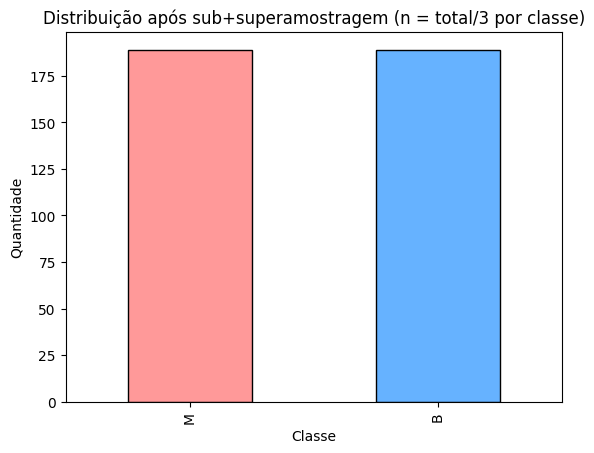

(diagnostico
 M    189
 B    189
 Name: count, dtype: int64,
 189)

In [5]:
# Número total de instâncias no dataset original
n_total = len(dados)

# Definindo o tamanho final de cada classe: total/3
n_por_classe = n_total // 3

# Subamostragem ou superamostragem de acordo com cada classe
classe_M_final = dados[dados["diagnostico"] == "M"].sample(
    n=n_por_classe, replace=len(classe_M) < n_por_classe, random_state=42
)
classe_B_final = dados[dados["diagnostico"] == "B"].sample(
    n=n_por_classe, replace=len(classe_B) < n_por_classe, random_state=42
)

# Concatenar
dados_final = pd.concat([classe_M_final, classe_B_final])

# Distribuição final
dist_final = dados_final["diagnostico"].value_counts()

# Histograma final
dist_final.plot(kind="bar", color=["#FF9999", "#66B2FF"], edgecolor="black")
plt.title("Distribuição após sub+superamostragem (n = total/3 por classe)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

dist_final, n_por_classe


### Questão 05.

Use o KMeansSMOTE com k=3 no arquivo original para balancear as classes.

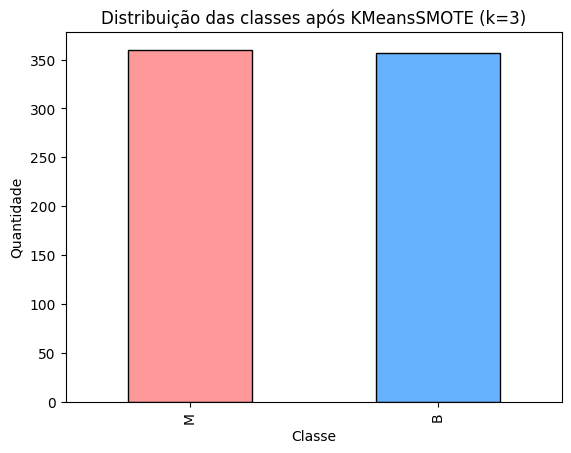

,count
diagnostico,
M,360
B,357


In [6]:
from imblearn.over_sampling import KMeansSMOTE

# Separar features e target no dataset original
X = dados.drop(columns=["ID", "diagnostico"])
y = dados["diagnostico"]

# Aplicar KMeansSMOTE diretamente com k=3
kmeans_smote = KMeansSMOTE(k_neighbors=3, random_state=42)
X_resampled, y_resampled = kmeans_smote.fit_resample(X, y)

# Verificar distribuição final
dist_kmeans_final = pd.Series(y_resampled).value_counts()

# Plotar histograma
dist_kmeans_final.plot(kind="bar", color=["#FF9999", "#66B2FF"], edgecolor="black")
plt.title("Distribuição das classes após KMeansSMOTE (k=3)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

dist_kmeans_final
